# Flight Status Predictor

## Executive Summary

This project is an educational initiative designed to familiarize us with the Machine Learning (ML) Pipeline. While our primary goal is to develop an ML model that predicts significant flight delays, it's important to note that we're focusing on the learning process rather than creating the most robust model possible. The project aims to build a tool that can forecast whether the arrival time of the flight will be delayed by more than 15 minutes. Users input specific details about their flight, and our model provides a straightforward yes or no prediction. This approach allows us to explore and understand each stage of the ML pipeline, from data preparation and feature selection to model training and evaluation.

At the heart of this project is a comprehensive dataset comprising **over 6.7 million flights from April 2023 to March 2024**. This meticulously cleaned and prepared data not only powers our predictive model but also serves as a valuable resource for exploratory data analysis (EDA) and further machine learning applications in the aviation domain.

The project is designed to empower travelers, airlines, and analysts alike. By transforming raw flight data into actionable insights, we're working to enhance travel planning, improve airline operations, and deepen our understanding of air travel patterns. This project bridges the gap between big data and practical applications, ultimately aiming to make air travel more predictable and less stressful for everyone involved.

**What problem are we trying to solve?**

The goal of this project is to **develop and deploy an ML model** in which an end user can specify a set of features describing a commercial flight of interest and receive a categorical (yes or no) output indicating if the arrival time of that flight will be delayed more than fifteen minutes or not. 

**Answer these questions about the data:**
- What variables contribute to a flight being delayed or not upon arrival?
- Are there any variables that might hinder the analysis?
- Is there imbalance or bias in the dataset that could make the data lean more towards one way than another? 

---

In [43]:
# Import libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.utils import resample
%matplotlib inline

In [44]:
# Store CSV file in variable 
flights = r'..\data\DF_from_EDA_for_Feature_Selection.csv'
# Read CSV file in pandas dataframe 
df = pd.read_csv(flights)

In [45]:
# Print dataframe to confirm successful loading
df

,Carrier_Name,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Origin_IATA_Code,Origin_City_State,...,Scheduled_Departure_Time,Scheduled_Arrival_Time,Arr_Time_Block_Group,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Number_of_Flights,Distance_Miles,Distance_Group,delayed
0,United Air Lines Inc.,Wednesday,2023-04-26,19977,N851UA,1788,11298,30194,DFW,"Dallas/Fort Worth, TX",...,1926,2359,Night,0,0,213,1,1372,6,0
1,United Air Lines Inc.,Wednesday,2023-04-26,19977,N37530,1787,11292,30325,DEN,"Denver, CO",...,2051,2316,Night,0,0,85,1,472,2,1
2,United Air Lines Inc.,Wednesday,2023-04-26,19977,N78509,1786,12892,32575,LAX,"Los Angeles, CA",...,2328,701,Early Morning,0,0,273,1,2052,9,0
3,United Air Lines Inc.,Wednesday,2023-04-26,19977,N47280,1785,10721,30721,BOS,"Boston, MA",...,600,735,Early Morning,0,0,95,1,413,2,0
4,United Air Lines Inc.,Wednesday,2023-04-26,19977,N826UA,1784,14747,30559,SEA,"Seattle, WA",...,1116,1459,Early Afternoon,0,0,163,1,1024,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777973,Republic Airline,Friday,2024-03-29,20452,N236JQ,5646,10721,30721,BOS,"Boston, MA",...,1315,1507,Afternoon,0,0,112,1,399,2,0
6777974,Republic Airline,Friday,2024-03-29,20452,N236JQ,5646,11278,30852,DCA,"Washington, DC",...,1620,1802,Evening,0,0,102,1,399,2,0
6777975,Republic Airline,Friday,2024-03-29,20452,N212JQ,5647,10721,30721,BOS,"Boston, MA",...,1425,1659,Afternoon,0,0,154,1,752,4,0
6777976,Republic Airline,Friday,2024-03-29,20452,N212JQ,5647,11193,33105,CVG,"Cincinnati, OH",...,1751,1958,Evening,0,0,127,1,752,4,0


# Data Preprocessing (Data Cleaning and Preparation)

I'm tackling the critical task of data preprocessing. My goal is to transform millions of raw flight records into a clean, analysis-ready dataset. I'm carefully cleaning and structuring data from **over 6.7 million** flights, selecting the most relevant features, and ensuring the information is in the best format for our machine learning model. This process not only sets the stage for accurate delay predictions but also creates a valuable resource for broader aviation insights. By focusing on data quality and accessibility, I'm laying the groundwork for both our immediate project goals and future exploratory analyses in the fascinating world of air travel.

<span style="color:red">**NOTE**</span>: This step was mostly taken care of during EDA, but wanted to still view the data and make any necessary adjustments

In [48]:
df.columns

Index(['Carrier_Name', 'Week_Day', 'Flight_Date', 'Airline_DOT_ID',
       'Tail_Number', 'Flight_Number', 'Origin_Airport_ID',
       'Origin_City_Market_ID', 'Origin_IATA_Code', 'Origin_City_State',
       'Destination_Airport_ID', 'Destination_City_Market_ID',
       'Destination_IATA_Code', 'Destination_City_State',
       'Dep_Time_Block_Group', 'Scheduled_Departure_Time',
       'Scheduled_Arrival_Time', 'Arr_Time_Block_Group', 'Flight_Cancelled',
       'Flight_Diverted', 'Scheduled_Gate_to_Gate_Time', 'Number_of_Flights',
       'Distance_Miles', 'Distance_Group', 'delayed'],
      dtype='object')

### Check For Correct Dtypes

Checking for correct data types (dtypes) is crucial in data preprocessing as it ensures data integrity and optimizes performance. Proper dtypes facilitate accurate calculations, enable efficient storage, and allow for seamless functionality with data analysis libraries. Moreover, correct dtypes improve machine learning model accuracy and enable more effective feature engineering, which is essential for our flight delay prediction project.

In [50]:
# Get summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 25 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   Carrier_Name                 object
 1   Week_Day                     object
 2   Flight_Date                  object
 3   Airline_DOT_ID               int64 
 4   Tail_Number                  object
 5   Flight_Number                int64 
 6   Origin_Airport_ID            int64 
 7   Origin_City_Market_ID        int64 
 8   Origin_IATA_Code             object
 9   Origin_City_State            object
 10  Destination_Airport_ID       int64 
 11  Destination_City_Market_ID   int64 
 12  Destination_IATA_Code        object
 13  Destination_City_State       object
 14  Dep_Time_Block_Group         object
 15  Scheduled_Departure_Time     int64 
 16  Scheduled_Arrival_Time       int64 
 17  Arr_Time_Block_Group         object
 18  Flight_Cancelled             int64 
 19  Flight_Diverted      

Columns that need to be converted to Object dtype: 
- Airline_DOT_ID
- Flight_Number
- Origin_Airport_ID
- Origin_City_Market_ID
- Destination_Airport_ID
- Destination_City_Market_ID

Holding off on converting since some columns will not be needed for analysis

### NULL and Duplicate Values

Checking for **null** records is crucial as they can skew analyses and cause errors in our flight delay prediction model, requiring appropriate handling through imputation or removal. Identifying and addressing **duplicate** records prevents data inflation and bias, ensuring each flight is represented accurately without undue influence on our predictions. These checks are fundamental to maintaining data integrity and building a reliable model, especially given our **large dataset of 6.7+ million** flight records.

In [54]:
# Check for missing values 
print(df.isnull().sum())

Carrier_Name                   0
Week_Day                       0
Flight_Date                    0
Airline_DOT_ID                 0
Tail_Number                    0
Flight_Number                  0
Origin_Airport_ID              0
Origin_City_Market_ID          0
Origin_IATA_Code               0
Origin_City_State              0
Destination_Airport_ID         0
Destination_City_Market_ID     0
Destination_IATA_Code          0
Destination_City_State         0
Dep_Time_Block_Group           0
Scheduled_Departure_Time       0
Scheduled_Arrival_Time         0
Arr_Time_Block_Group           0
Flight_Cancelled               0
Flight_Diverted                0
Scheduled_Gate_to_Gate_Time    0
Number_of_Flights              0
Distance_Miles                 0
Distance_Group                 0
delayed                        0
dtype: int64


In [55]:
# Check for duplicate entries
df[df.duplicated()]

,Carrier_Name,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Origin_IATA_Code,Origin_City_State,...,Scheduled_Departure_Time,Scheduled_Arrival_Time,Arr_Time_Block_Group,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Number_of_Flights,Distance_Miles,Distance_Group,delayed


As stated before during EDA, there doesn't appear to be any duplicated rows

Remember, during EDA, we already renamed the target variable column **Arr_Delay_At_Least_15_Minutes** to **delayed**

In [147]:
df.columns

Index(['Carrier_Name', 'Week_Day', 'Flight_Date', 'Flight_Number',
       'Origin_City_State', 'Destination_City_State', 'Dep_Time_Block_Group',
       'Scheduled_Departure_Time', 'Scheduled_Arrival_Time',
       'Scheduled_Gate_to_Gate_Time', 'Distance_Miles', 'Distance_Group',
       'delayed'],
      dtype='object')

### Remove Columns To Avoid Any Biases and Imbalance

We now want to remove some variables from the dataframe to further enhance feature selection
- This will get rid of any biases and imbalance to our data

To build a reliable and fair flight delay prediction model, it's essential to remove columns that could lead to information leakage. This happens when we include data that wouldn't be available at prediction time, like actual arrival times or delay status. By excluding these columns, our model learns from valid predictive features, ensuring it performs accurately in real-world scenarios.

**Flight_Cancelled** and **Flight_Diverted** needs to be removed because "The consideration of canceled and diverted flights is outside the scope of this project and therefore will not be included in the model."

**Origin_Airport_ID, Origin_City_Market_ID, Origin_IATA_Code, Destination_Airport_ID, Destination_City_Market_ID, Destination_IATA_Code, Airline_DOT_ID, Arr_Time_Block_Group** 
- Removed since these are unique identifiers and will not be worth using for feature selection

**Arr_Time_Block_Group** - Arrival Time Block Group: This variable bins arrival flight times into one of six colloquial segments—Early Morning, Morning, Early Afternoon, Afternoon, Evening, and Night.
- This variable was removed due to telling when a flight arrived. This means it was probably recorded after the flight has arrived, so thinking do not need this variable

**Number_of_Flights** 
- Removed due to only having 1 value in the column 

**Tail_Number** 
- Column is really big when trying to perform correlation analysis, so removed this as well to improve performance 

In [60]:
# Drop columns due to information leakage and to enhance feature selection capabilities 
df.drop(['Flight_Cancelled', 'Flight_Diverted', 'Origin_Airport_ID', 'Origin_City_Market_ID', 'Origin_IATA_Code', 
         'Destination_Airport_ID', 'Destination_City_Market_ID', 'Destination_IATA_Code', 'Airline_DOT_ID', 
         'Arr_Time_Block_Group', 'Number_of_Flights', 'Tail_Number'], axis=1, inplace=True)

print("Columns remaining: ", df.shape[1])

Columns remaining:  13


Remember, during EDA, we already renamed the target variable column **Arr_Delay_At_Least_15_Minutes** to **delayed**

In [62]:
df.columns

Index(['Carrier_Name', 'Week_Day', 'Flight_Date', 'Flight_Number',
       'Origin_City_State', 'Destination_City_State', 'Dep_Time_Block_Group',
       'Scheduled_Departure_Time', 'Scheduled_Arrival_Time',
       'Scheduled_Gate_to_Gate_Time', 'Distance_Miles', 'Distance_Group',
       'delayed'],
      dtype='object')

In [63]:
# View summary of dataset after dropping columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 13 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   Carrier_Name                 object
 1   Week_Day                     object
 2   Flight_Date                  object
 3   Flight_Number                int64 
 4   Origin_City_State            object
 5   Destination_City_State       object
 6   Dep_Time_Block_Group         object
 7   Scheduled_Departure_Time     int64 
 8   Scheduled_Arrival_Time       int64 
 9   Scheduled_Gate_to_Gate_Time  int64 
 10  Distance_Miles               int64 
 11  Distance_Group               int64 
 12  delayed                      int64 
dtypes: int64(7), object(6)
memory usage: 672.3+ MB


---

# Exploratory Data Analysis (EDA) Refresher

I performed EDA as it reveals the dataset’s patterns and anomalies. By identifying trends, spotting outliers, and assessing data quality, we ensure accuracy and relevance. This process helps me select the best features and refine our hypotheses, resulting in a reliable flight delay prediction model.

### How many flights were delayed? 

Understanding how many flights were delayed gives us insight into the performance and reliability of the data. It further assesses imbalance in the dataset and guides us in handling it. This information is vital for assessing the impact on passengers and operations, leading to better decision-making and resource allocation.

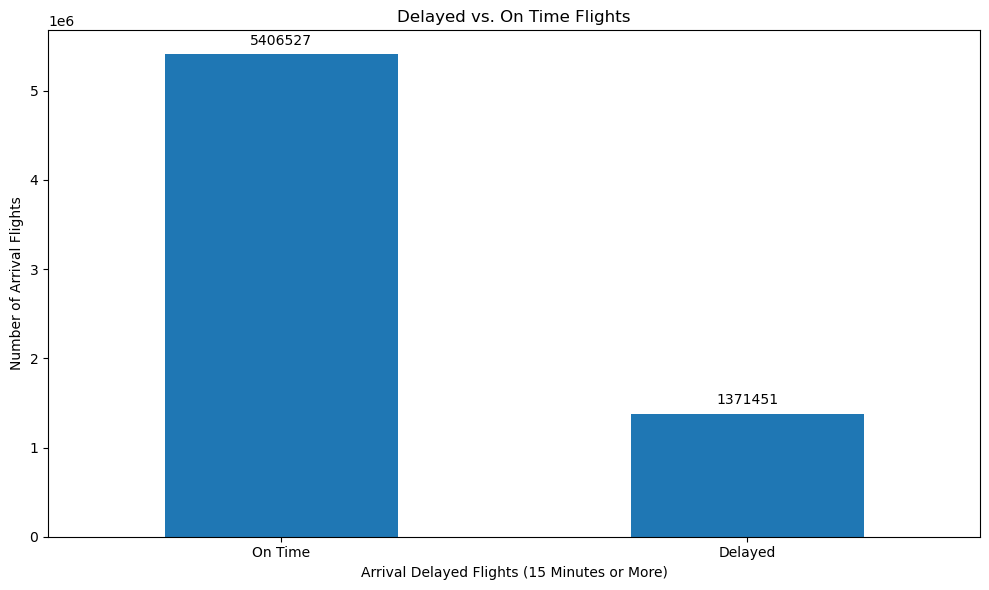

delayed
0    79.766075
1    20.233925
Name: count, dtype: float64


In [67]:
# Count the occurrences of flight delays
delayed_counts = df['delayed'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
ax = delayed_counts.plot(kind='bar')

# Add text annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
    
plt.xlabel('Arrival Delayed Flights (15 Minutes or More)')
plt.ylabel('Number of Arrival Flights')
plt.title('Delayed vs. On Time Flights')
plt.xticks(ticks=[0, 1], rotation=0, labels=['On Time', 'Delayed'], ha='center')  # Rotate x-axis labels for better visibility and define labels 
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

print((df['delayed'].value_counts()/df.shape[0]) * 100)

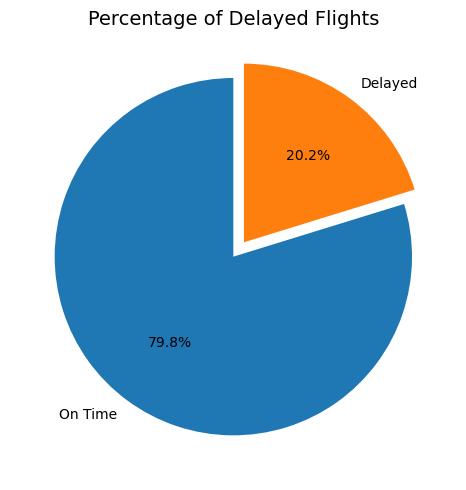

In [68]:
# Visualizing Delayed Flight Percentage

# Extract total number of on time and delayed flights
on_time, delayed = df['delayed'].value_counts()

# Data and Labels
data = [on_time, delayed]
keys = ['On Time', 'Delayed']

# Pie Chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    data,
    labels=keys,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0, 0.1]
)


# Adjusting Figure Size
fig.set_size_inches(5, 5)

# Title and Layout Adjustments
plt.title('Percentage of Delayed Flights', fontsize=14)
plt.tight_layout()

# Display the plot
plt.show()

From the bar and pie chart, you can clearly see an imbalance to our dataset. **20.2%** of flights were Delayed while **79.8%** of flights were On Time. 

**Definition of Imbalanced Datasets for a Binary Classification Problem**
- Target variable has uneven distribution of observations (i.e., one class label has very high number of observations, and the other has a deficient number of observations)

By definition, this can cause a problem with our model predicitons. 

*One such example is diagnosing a disease. From an existing dataset, we see that for every 100 records, only 5 patients are diagnosed. The majority class would be the 95% with no disease and the minority class would be the 5% with the disease. The assumption here would be that all 100 out of 100 patients would not be diagnosed with a disease.*

This can cause bias within the data because our classifier would lean more towards one outcome than another, which would create inaccurate predictions and lead to a more biased model. 

**Reasons why imbalanced data causes issues**
- Skewed class distribution
- Biased model training
- Poor generalization
- Costly errors
- Evaluation metrics misleading

You can read more in the below link: 

[About Imbalanced Datasets](https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/#:~:text=an%20imbalanced%20dataset.-,Why%20is%20Imbalanced%20Data%20a%20Problem?,measured%20by%20metrics%20like%20accuracy.)

To alleviate any sort of imbalance and give classifier equal importance to both classes, we will down sample our data

---

# Down Sampling Data To Address Imbalance In Target Variable

In [72]:
# Separate majority and minority classes
df_majority = df[df.delayed == 0]
df_minority = df[df.delayed == 1]

# Downsample majority class to match minority class size
df_majority_downsampled = resample(df_majority,
                                    replace=False,  # Sample without replacement
                                    n_samples=len(df_minority),  # Match minority class size
                                    random_state=1)  # Ensure reproducibility

# Combine minority class with downsampled majority class
df_ds = pd.concat([df_minority, df_majority_downsampled])

# Shuffle the resulting dataframe
df_ds = df_ds.sample(frac=1, random_state=1).reset_index(drop=True)

# Verify the new class distribution
print(df_ds['delayed'].value_counts())

# Verify new dataframe shape
print(df_ds.shape)

delayed
0    1371451
1    1371451
Name: count, dtype: int64
(2742902, 13)


In [73]:
# View summary of dataset after downsampling the data
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742902 entries, 0 to 2742901
Data columns (total 13 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   Carrier_Name                 object
 1   Week_Day                     object
 2   Flight_Date                  object
 3   Flight_Number                int64 
 4   Origin_City_State            object
 5   Destination_City_State       object
 6   Dep_Time_Block_Group         object
 7   Scheduled_Departure_Time     int64 
 8   Scheduled_Arrival_Time       int64 
 9   Scheduled_Gate_to_Gate_Time  int64 
 10  Distance_Miles               int64 
 11  Distance_Group               int64 
 12  delayed                      int64 
dtypes: int64(7), object(6)
memory usage: 272.0+ MB


## Export DataFrame with removed columns to CSV 

This will make it easier for future analysis with the dataset already downsampled

**This file will be used for Model Selection**

In [75]:
df_ds

,Carrier_Name,Week_Day,Flight_Date,Flight_Number,Origin_City_State,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,Scheduled_Arrival_Time,Scheduled_Gate_to_Gate_Time,Distance_Miles,Distance_Group,delayed
0,United Air Lines Inc.,Tuesday,2023-09-05,773,"Denver, CO","Nashville, TN",Afternoon,1743,2119,156,1014,5,0
1,Delta Air Lines Inc.,Friday,2024-03-29,2641,"Salt Lake City, UT","Seattle, WA",Afternoon,1710,1823,133,689,3,0
2,American Airlines Inc.,Sunday,2023-06-04,2677,"Orlando, FL","Dallas/Fort Worth, TX",Early Morning,550,745,175,985,4,0
3,Delta Air Lines Inc.,Friday,2023-08-04,1451,"Jacksonville, FL","Boston, MA",Early Afternoon,1215,1459,164,1010,5,1
4,Southwest Airlines Co.,Tuesday,2023-04-18,185,"Dallas, TX","Indianapolis, IN",Evening,1955,2255,120,755,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,Thursday,2023-10-26,4815,"Dallas/Fort Worth, TX","Killeen, TX",Morning,1044,1202,78,134,1,1
2742898,Southwest Airlines Co.,Thursday,2023-07-20,4277,"Las Vegas, NV","El Paso, TX",Afternoon,1620,1905,105,583,3,1
2742899,Endeavor Air Inc.,Saturday,2024-01-27,4915,"Des Moines, IA","New York, NY",Early Afternoon,1300,1644,164,1031,5,0
2742900,Southwest Airlines Co.,Thursday,2023-07-20,1817,"Phoenix, AZ","St. Louis, MO",Evening,2015,115,180,1262,6,1


In [76]:
# Export the downsampled dataset to csv for model selection 
df_ds.to_csv(r'..\data\DF_from_Feature_Sel_for_Model_Sel.csv', index=False)

---

# Determining Categorical Variable Cardinality

This is key because it tells us how many unique categories a variable has. This helps us manage data preprocessing more effectively, as high cardinality can impact model performance and efficiency. Knowing this allows us to choose the right encoding methods and ensure the model handles categorical data smoothly.

In [79]:
# Identify categorical columns
categorical_columns = df_ds.select_dtypes(include=['object']).columns

# Count unique values in each categorical column
unique_counts = df_ds[categorical_columns].nunique()
unique_counts

Carrier_Name               15
Week_Day                    7
Flight_Date               366
Origin_City_State         341
Destination_City_State    342
Dep_Time_Block_Group        6
dtype: int64

---

# Feature Selection

Feature selection involves choosing the most relevant variables for your model from a larger set of features. It helps improve model performance by reducing overfitting, enhancing accuracy, and speeding up the training process. By focusing on the most important features, you ensure that the model learns from the most impactful data, leading to more reliable and interpretable results.

## First Attempt at Feature Selection

Ideally the features selected should be information that is:
- Easily accessed by the end user
- Timely (i.e. - information available before a flight takes place)

The fewer features needed while maintaining accuracy, the better

### Correlation Analysis Using Phik Correlation Matrix

Correlation analysis examines the relationships between variables to understand how they influence each other. In feature selection, correlation analysis helps identify which features are strongly related to the target variable (delayed) and which are less relevant. By selecting features with strong correlations to the target, we can enhance the model's predictive power and efficiency, while removing those with weak or redundant relationships, leading to a more focused and effective model.
Correlation analysis will help us to determine which variables are worth diving into to prepare for model building 


Highly correlated features with delayed above 20.0%:
['Flight_Date', 'Dep_Time_Block_Group', 'Scheduled_Departure_Time', 'Scheduled_Arrival_Time']


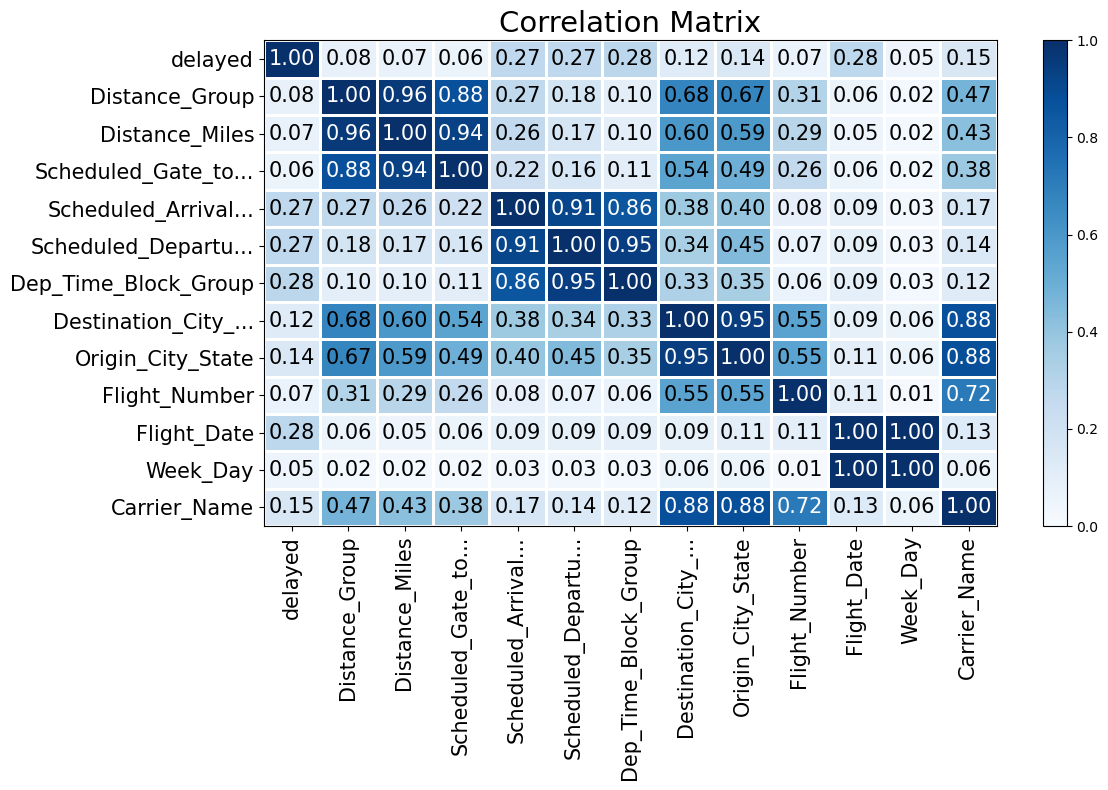

In [85]:
# Phik Correlation Matrix between all variables
corr_matrix = df_ds.phik_matrix(interval_cols=['Flight_Number', 'Scheduled_Departure_Time', 'Scheduled_Arrival_Time', 
                                            'delayed', 'Scheduled_Gate_to_Gate_Time', 'Distance_Miles', 'Distance_Group'])

# Select the target variable correlation
target_variable = 'delayed'  
correlations = corr_matrix[target_variable]

# Retrieve features with correlation above the threshold
threshold = 0.2
highly_correlated_features = correlations[correlations > threshold].index.tolist()

# Remove the target variable itself from the list
if target_variable in highly_correlated_features:
    highly_correlated_features.remove(target_variable)

print(f'Highly correlated features with {target_variable} above {threshold*100}%:')
print(highly_correlated_features)

plot_correlation_matrix(corr_matrix.values, x_labels=corr_matrix.columns, y_labels=corr_matrix.index, vmin=0, vmax=1, 
                       color_map='Blues', title='Correlation Matrix', fontsize_factor=1.5, figsize=(12,8))
plt.tight_layout()

In [86]:
# Add highly correlated features into a new dataframe 
df_features = pd.DataFrame(data=df_ds[['Carrier_Name', 'Flight_Date', 'Dep_Time_Block_Group', 'Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 'delayed']])
df_features

,Carrier_Name,Flight_Date,Dep_Time_Block_Group,Scheduled_Arrival_Time,Scheduled_Departure_Time,delayed
0,United Air Lines Inc.,2023-09-05,Afternoon,2119,1743,0
1,Delta Air Lines Inc.,2024-03-29,Afternoon,1823,1710,0
2,American Airlines Inc.,2023-06-04,Early Morning,745,550,0
3,Delta Air Lines Inc.,2023-08-04,Early Afternoon,1459,1215,1
4,Southwest Airlines Co.,2023-04-18,Evening,2255,1955,1
...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,2023-10-26,Morning,1202,1044,1
2742898,Southwest Airlines Co.,2023-07-20,Afternoon,1905,1620,1
2742899,Endeavor Air Inc.,2024-01-27,Early Afternoon,1644,1300,0
2742900,Southwest Airlines Co.,2023-07-20,Evening,115,2015,1


In [87]:
# Convert 'Flight_Date' to datetime objects
df_features['Flight_Date'] = pd.to_datetime(df_features['Flight_Date'])

# Extract month, year, and day
df_features['Month'] = df_features['Flight_Date'].dt.month
df_features['Year'] = df_features['Flight_Date'].dt.year
df_features['Day'] = df_features['Flight_Date'].dt.day

In [88]:
df_features

,Carrier_Name,Flight_Date,Dep_Time_Block_Group,Scheduled_Arrival_Time,Scheduled_Departure_Time,delayed,Month,Year,Day
0,United Air Lines Inc.,2023-09-05,Afternoon,2119,1743,0,9,2023,5
1,Delta Air Lines Inc.,2024-03-29,Afternoon,1823,1710,0,3,2024,29
2,American Airlines Inc.,2023-06-04,Early Morning,745,550,0,6,2023,4
3,Delta Air Lines Inc.,2023-08-04,Early Afternoon,1459,1215,1,8,2023,4
4,Southwest Airlines Co.,2023-04-18,Evening,2255,1955,1,4,2023,18
...,...,...,...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,2023-10-26,Morning,1202,1044,1,10,2023,26
2742898,Southwest Airlines Co.,2023-07-20,Afternoon,1905,1620,1,7,2023,20
2742899,Endeavor Air Inc.,2024-01-27,Early Afternoon,1644,1300,0,1,2024,27
2742900,Southwest Airlines Co.,2023-07-20,Evening,115,2015,1,7,2023,20


In [89]:
# Drop unnecessary columns from new dataframe 
df_features.drop(['Flight_Date'], axis=1, inplace=True)

In [90]:
df_features

,Carrier_Name,Dep_Time_Block_Group,Scheduled_Arrival_Time,Scheduled_Departure_Time,delayed,Month,Year,Day
0,United Air Lines Inc.,Afternoon,2119,1743,0,9,2023,5
1,Delta Air Lines Inc.,Afternoon,1823,1710,0,3,2024,29
2,American Airlines Inc.,Early Morning,745,550,0,6,2023,4
3,Delta Air Lines Inc.,Early Afternoon,1459,1215,1,8,2023,4
4,Southwest Airlines Co.,Evening,2255,1955,1,4,2023,18
...,...,...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,Morning,1202,1044,1,10,2023,26
2742898,Southwest Airlines Co.,Afternoon,1905,1620,1,7,2023,20
2742899,Endeavor Air Inc.,Early Afternoon,1644,1300,0,1,2024,27
2742900,Southwest Airlines Co.,Evening,115,2015,1,7,2023,20


In [91]:
# Grouping numerical columns and
# Moving the target variable to be the right-most column

# Columns to move
cols_to_move = [
                'Carrier_Name',
                'Dep_Time_Block_Group',
                'Scheduled_Departure_Time',
                'Scheduled_Arrival_Time',
                'Month', 
                'Year', 
                'Day'
                ]
       
last_col = 'delayed'

# Extracting the columns to move
columns_to_move = df_features[cols_to_move]

# Dropping these columns from the DataFrame
df_features.drop(columns=cols_to_move, inplace=True)

# Extracting the last column
last_column = df_features.pop(last_col)

# Reinserting the numerical columns
df_features = pd.concat([df_features, columns_to_move], axis=1)

# Reinserting the last column
df_features[last_col] = last_column

In [92]:
df_features

,Carrier_Name,Dep_Time_Block_Group,Scheduled_Departure_Time,Scheduled_Arrival_Time,Month,Year,Day,delayed
0,United Air Lines Inc.,Afternoon,1743,2119,9,2023,5,0
1,Delta Air Lines Inc.,Afternoon,1710,1823,3,2024,29,0
2,American Airlines Inc.,Early Morning,550,745,6,2023,4,0
3,Delta Air Lines Inc.,Early Afternoon,1215,1459,8,2023,4,1
4,Southwest Airlines Co.,Evening,1955,2255,4,2023,18,1
...,...,...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,Morning,1044,1202,10,2023,26,1
2742898,Southwest Airlines Co.,Afternoon,1620,1905,7,2023,20,1
2742899,Endeavor Air Inc.,Early Afternoon,1300,1644,1,2024,27,0
2742900,Southwest Airlines Co.,Evening,2015,115,7,2023,20,1


## Second Attempt at Feature Selection

This attempt at feature selection is based off of experimenting on different feature selection techniques

In [135]:
# Identify categorical and numerical columns
categorical_columns = df_ds.select_dtypes(include=['object']).columns
numerical_columns = df_ds.select_dtypes(include=['int64', 'float64']).columns

# Encode categorical variables
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_ds[column] = le.fit_transform(df_ds[column])
    label_encoders[column] = le

# Scale numerical features
scaler = StandardScaler()
df_ds[numerical_columns] = scaler.fit_transform(df_ds[numerical_columns])

# Display processed data info and head
print(df_ds.info())
df_ds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742902 entries, 0 to 2742901
Data columns (total 13 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Carrier_Name                 int32  
 1   Week_Day                     int32  
 2   Flight_Date                  int32  
 3   Flight_Number                float64
 4   Origin_City_State            int32  
 5   Destination_City_State       int32  
 6   Dep_Time_Block_Group         int32  
 7   Scheduled_Departure_Time     float64
 8   Scheduled_Arrival_Time       float64
 9   Scheduled_Gate_to_Gate_Time  float64
 10  Distance_Miles               float64
 11  Distance_Group               float64
 12  delayed                      float64
dtypes: float64(7), int32(6)
memory usage: 209.3 MB
None


,Carrier_Name,Week_Day,Flight_Date,Flight_Number,Origin_City_State,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,Scheduled_Arrival_Time,Scheduled_Gate_to_Gate_Time,Distance_Miles,Distance_Group,delayed
0,14,5,157,-0.967114,83,220,0,0.724736,1.091750,0.112006,0.275431,0.482054,-1.0
1,3,0,363,0.238151,275,295,0,0.657512,0.536620,-0.203056,-0.267736,-0.370070,-1.0
2,2,3,64,0.261378,235,78,2,-1.705530,-1.485104,0.372274,0.226964,0.055992,-1.0
3,3,0,125,-0.529657,154,40,1,-0.350855,-0.146040,0.221593,0.268746,0.482054,1.0
4,12,5,17,-1.346501,77,148,3,1.156602,1.346809,-0.381134,-0.157432,0.055992,1.0


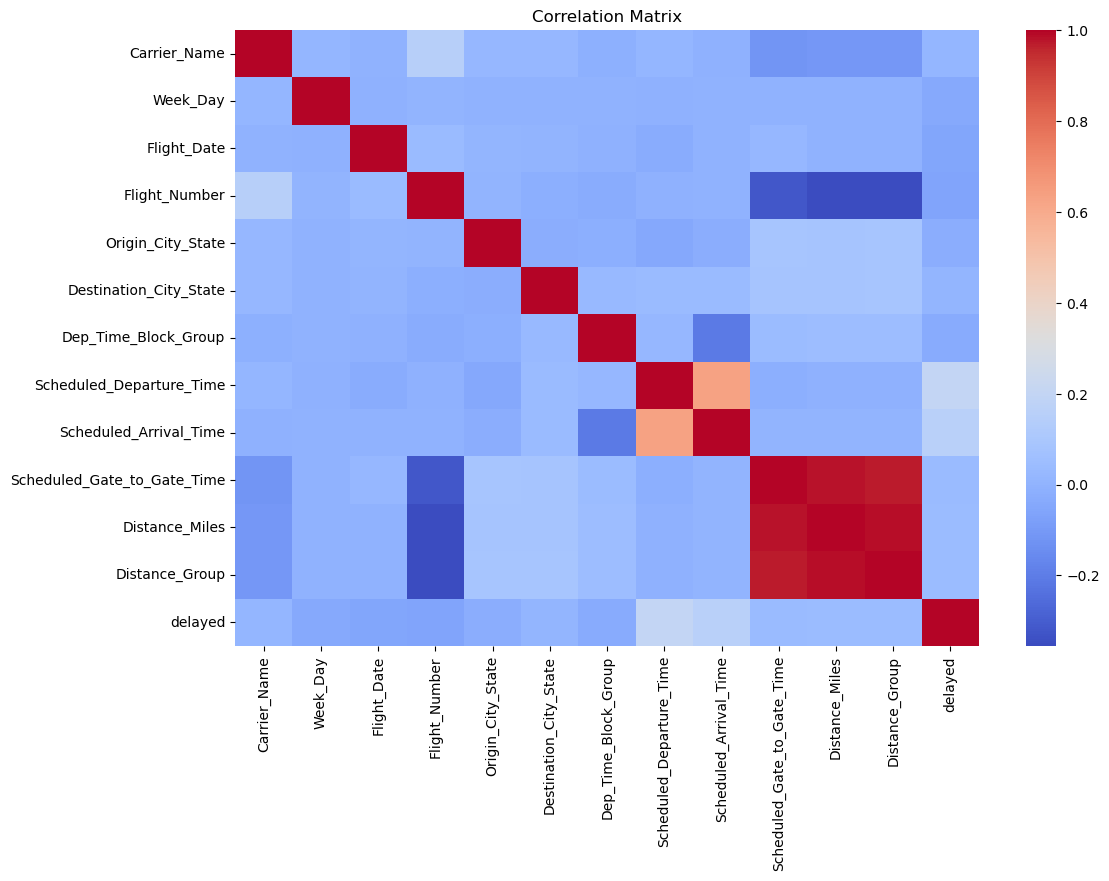

delayed                        1.000000
Scheduled_Departure_Time       0.197662
Scheduled_Arrival_Time         0.154839
Distance_Group                 0.039408
Distance_Miles                 0.039145
Scheduled_Gate_to_Gate_Time    0.032860
Carrier_Name                   0.011748
Destination_City_State         0.007827
Origin_City_State             -0.025167
Dep_Time_Block_Group          -0.034005
Week_Day                      -0.042382
Flight_Date                   -0.056365
Flight_Number                 -0.060097
Name: delayed, dtype: float64


In [96]:
# Calculate correlation matrix
correlation_matrix = df_ds.corr()

# Get correlations with the target variable
target_correlation = correlation_matrix['delayed'].sort_values(ascending=False)

# Plot correlation heatmap for features with highest correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print(target_correlation)

### ANOVA F-Test and Chi-Squared Test 

The ANOVA F-test helps in feature selection by assessing whether there are significant differences in the means of a continuous target variable (delayed) across different categories of a categorical feature. In other words, it tests if the feature has a meaningful impact on the target variable. A high F-value indicates that the feature significantly influences the target, suggesting it is important for the model. By using the ANOVA F-test, we can prioritize features that have a strong effect on the target variable and exclude those with little to no impact, leading to a more effective and streamlined model.

The Chi-Squared test helps in feature selection by evaluating the relationship between categorical features and the target variable (delayed). It assesses whether the distribution of observations across categories is significantly different from what would be expected if there were no association between the feature and the target. A high chi-squared statistic indicates a strong association, suggesting that the feature is important for predicting the target variable. By using the Chi-Squared test, we can identify and retain features that have a meaningful impact on the target, improving the model’s relevance and performance.

In [97]:
# Define target and features
X = df_ds
y = df_ds['delayed']
# Ensure target variable is in integer format
y = y.astype(int)

In [98]:
# Numerical features
numerical_features = ['Flight_Number', 'Scheduled_Departure_Time', 'Scheduled_Arrival_Time', 
                      'Scheduled_Gate_to_Gate_Time', 'Distance_Miles', 'Distance_Group'] 
# Categorical features
categorical_features = ['Carrier_Name', 'Week_Day', 'Flight_Date', 'Origin_City_State', 'Destination_City_State', 'Dep_Time_Block_Group' ]

# Target variable
target = 'delayed'

In [99]:
# ANOVA f-test for numerical features
X_num = df_ds[numerical_features]
y = df_ds[target]
y = y.astype(int)
f_selector = SelectKBest(f_classif, k='all')
f_selector.fit(X_num, y)
numerical_scores = f_selector.scores_

In [100]:
# Chi-squared test for categorical features
X_cat = df_ds[categorical_features]
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_cat, y)
categorical_scores = chi2_selector.scores_

In [101]:
# Print the scores
print("ANOVA F-test scores for numerical features:")
for feature, score in zip(numerical_features, numerical_scores):
    print(f"{feature}: {score}")

print("\nChi-squared test scores for categorical features:")
for feature, score in zip(categorical_features, categorical_scores):
    print(f"{feature}: {score}")

ANOVA F-test scores for numerical features:
Flight_Number: 9942.294028459175
Scheduled_Departure_Time: 111523.4844478556
Scheduled_Arrival_Time: 67376.26484825877
Scheduled_Gate_to_Gate_Time: 2964.839752127016
Distance_Miles: 4209.506823187615
Distance_Group: 4266.392360606228

Chi-squared test scores for categorical features:
Carrier_Name: 1050.1041371620597
Week_Day: 6692.382177161485
Flight_Date: 549201.4546333862
Origin_City_State: 99428.58490599916
Destination_City_State: 9534.612975658149
Dep_Time_Block_Group: 3640.938182463941
